<a href="https://colab.research.google.com/github/ritikgoyal1701/CarVer-Project/blob/master/Car_Logo_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook, we are going to train our model to recognize car logos**

Importing the basic modules to train our program

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Downloading the dataset from kaggle**

In [ ]:
!kaggle datasets download -d ritikgoyal1710/car-logo-2

 48% 9.00M/18.6M [00:00<00:00, 44.1MB/s]
100% 18.6M/18.6M [00:00<00:00, 73.8MB/s]


In [ ]:
os.makedirs("/content/image")

**Unzipping the dataset in a mentioned directory**

In [ ]:
!unzip -d "/content/image" "/content/car-logo-2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: /content/image/TrainingData/TrainingData/Lexus/0002.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0003.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0004.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0005.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0006.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0007.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0008.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0009.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0010.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0011.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0012.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0013.jpg  
  inflating: /content/image/TrainingData/TrainingData/Lexus/0014.jpg  
  inflating: /content/imag

**Preparing the dataset to train our model**

In [ ]:
data = ImageDataBunch.from_folder( Path("image/TrainingData/TrainingData"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

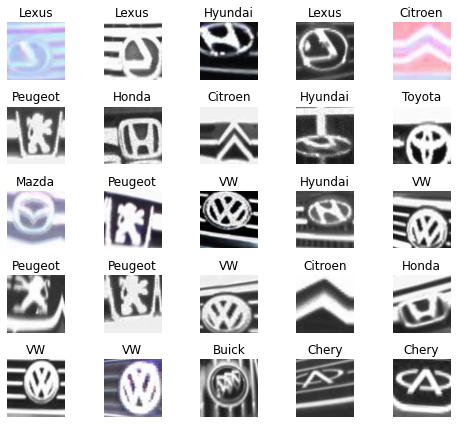

In [ ]:
data.show_batch(rows=5, figsize=(7,6))

**Now, we start the training using Convolutional Neural Network backbone**

**Here we are using the Resnet 50 model**

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.358967,0.071331,0.975500,01:09
1,0.105847,0.022312,0.993000,01:08


**Mounting the google dr

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/Car_Logo",exist_ok=True)

In [ ]:
path="/content/drive/My Drive/dl_projects/Car_Logo"

In [ ]:
learn.save(path+"/Stage-1")

In [ ]:
learn.export(path+"/export.pkl")